In [49]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
import matplotlib.pyplot as plt
import keras.datasets as mnist
import tensorflow.keras as tk
from keras.utils import to_categorical
import numpy as np

In [54]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [37]:
# mnist = tk.datasets.mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train.shape
# x_test.shape
# # co 60.000 anh de train va 10k anh de test

(10000, 28, 28)

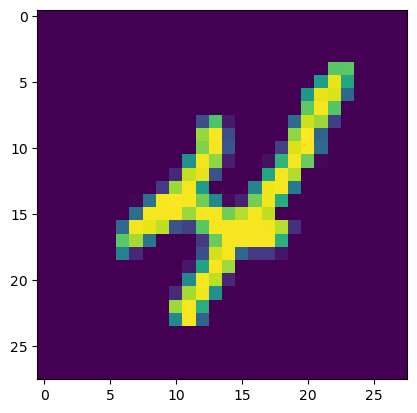

In [55]:
plt.imshow(x_train[9])

In [56]:
X_train = x_train.reshape(60000,28,28,1)
X_test = x_test.reshape(10000,28,28,1)
# dua anh ve anh xam

In [57]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [60]:
# tao models
model = Sequential()
# add model vao layer
model.add(Conv2D(64,kernel_size=(3,3),activation= 'relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(32,kernel_size=(3,3),activation= 'relu',input_shape=(28,28,1),padding='same' ))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [63]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 10)               

In [64]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 77s 40ms/step - loss: 0.2528 - accuracy: 0.9448 - val_loss: 0.0735 - val_accuracy: 0.9762
Epoch 2/3
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0701 - accuracy: 0.9792 - val_loss: 0.0518 - val_accuracy: 0.9841
Epoch 3/3
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0564 - accuracy: 0.9826 - val_loss: 0.0513 - val_accuracy: 0.9828


In [66]:
# luu model
model.save('model_doan.h5') 


In [80]:
y_hat=model.predict(X_test[19:20])
y_hat

1/1 [==============================] - 0s 56ms/step


array([[7.3691787e-16, 1.7553289e-08, 4.4359755e-12, 7.1220590e-13,
        1.0000000e+00, 4.9356315e-09, 2.5866648e-14, 2.1798261e-08,
        1.3829315e-11, 1.6696228e-08]], dtype=float32)

In [81]:
# du doan
y_label= np.argmax(y_hat,axis=1)
y_label 

array([4], dtype=int64)

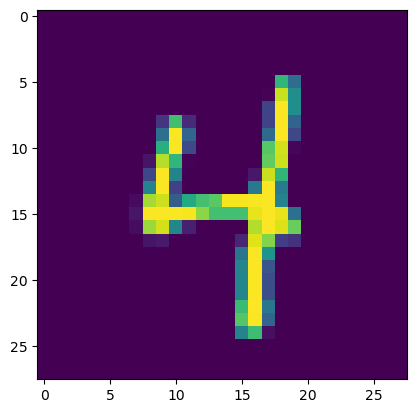

In [82]:
# gia tri thuc
(x_train, y_train), (x_test1, y_test) = keras.datasets.mnist.load_data()
plt.imshow(x_test1[19])